In [1]:
import pandas as pd
file_path = 'family_financial_and_transactions_data.xlsx'
data = pd.ExcelFile(file_path)
print(data.sheet_names)

['final_family_financial_and_tran']


In [2]:
sheet_name = 'final_family_financial_and_tran'
df = data.parse(sheet_name)
print(df.head())
print(df.info())

  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68 

In [3]:
family_spending = df.groupby('Family ID').agg(
    total_spending=('Amount', 'sum'),
    avg_spending_per_transaction=('Amount', 'mean'),
    income=('Income', 'mean'),
    savings=('Savings', 'mean'),
    monthly_expenses=('Monthly Expenses', 'mean'),
    loan_payments=('Loan Payments', 'mean'),
    credit_card_spending=('Credit Card Spending', 'mean'),
    dependents=('Dependents', 'mean'),
    financial_goals_met=('Financial Goals Met (%)', 'mean')
)

print(family_spending.head())


           total_spending  avg_spending_per_transaction    income  savings  \
Family ID                                                                    
FAM001           23188.90                    249.343011  113810.0  20234.0   
FAM002           22309.71                    253.519432   44592.0  29492.0   
FAM003           11220.34                    238.730638   33278.0  11365.0   
FAM004           23483.10                    247.190526  127196.0  30735.0   
FAM005           40246.21                    243.916424   66048.0   1212.0   

           monthly_expenses  loan_payments  credit_card_spending  dependents  \
Family ID                                                                      
FAM001               5781.0         2422.0                2959.0         2.0   
FAM002               5630.0         4541.0                 995.0         3.0   
FAM003               5282.0         1042.0                2818.0         0.0   
FAM004               3591.0         1571.0           

In [4]:
correlation_data = family_spending[['income', 'savings', 'monthly_expenses', 
                                    'loan_payments', 'credit_card_spending']]

correlation_matrix = correlation_data.corr()

print(correlation_matrix)


                        income   savings  monthly_expenses  loan_payments  \
income                1.000000 -0.108966         -0.068567      -0.035110   
savings              -0.108966  1.000000         -0.062675      -0.073023   
monthly_expenses     -0.068567 -0.062675          1.000000      -0.027247   
loan_payments        -0.035110 -0.073023         -0.027247       1.000000   
credit_card_spending -0.111184  0.005792         -0.057105      -0.010601   

                      credit_card_spending  
income                           -0.111184  
savings                           0.005792  
monthly_expenses                 -0.057105  
loan_payments                    -0.010601  
credit_card_spending              1.000000  


### Scoring Function for just preprocessing

In [ ]:
def financial_score(row):
    score = 0
    score += (row['savings'] / row['income']) * 40    
    score += (1 - row['monthly_expenses'] / row['income']) * 20    
    score += (1 - row['loan_payments'] / row['income']) * 15    
    score += (1 - row['credit_card_spending'] / row['income']) * 15    
    score += (row['financial_goals_met'] / 100) * 10
    
    return max(0, min(score, 100))  # thi is to make sure the score is between 0 to 100
family_spending['financial_score'] = family_spending.apply(financial_score, axis=1)
print(family_spending[['financial_score']].head())


           financial_score
Family ID                 
FAM001           62.186390
FAM002           78.067635
FAM003           68.746319
FAM004           67.036717
FAM005           57.465740


#### Saving the preprocessed data

In [12]:
output = 'processed_financials.csv'
family_spending.to_csv(output)
print(f" {output}")


 processed_financials.csv


this is a heatmap of correlations

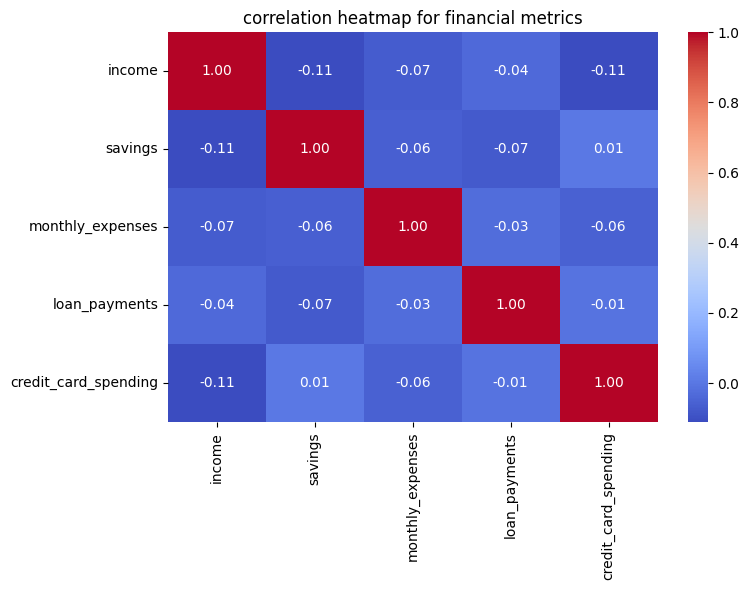

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
correlation_matrix = family_spending[['income', 'savings', 'monthly_expenses', 'loan_payments', 'credit_card_spending']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation heatmap for financial metrics')
plt.tight_layout()
plt.show()
